In [1]:
#Importing libraries and setting up data analysis environment

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mplimg
%matplotlib inline

import seaborn as sns


In [2]:
# Reading the airbnb data csv file using a pandas feature and examining a sample of the data within
df = pd.read_csv('C:/Users/saisi/Desktop/Portfolio Projects/nyc airbnb/AB_NYC_2019.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Discovering intitial data insights

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
# How many rows and colums are in this dataset?
df.shape

(48895, 16)

In [5]:
#Understanding the columsn in this dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Pre-Processing Data

In [6]:
# Checking to find which areas of the dataset has null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Removing insignificant and sensitive data

df.drop(['id', 'host_name', 'last_review'], axis = 1, inplace= True)

df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
# Replacing empty cells with zero to reduce errors and examining changes afterwards
df.fillna({'reviews_per_month' :0}, inplace = True)
df.reviews_per_month.isnull().sum()

0

In [9]:
# Identifying the neighbourhoood diversity in this dataset
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### Exploring the Data for Insights

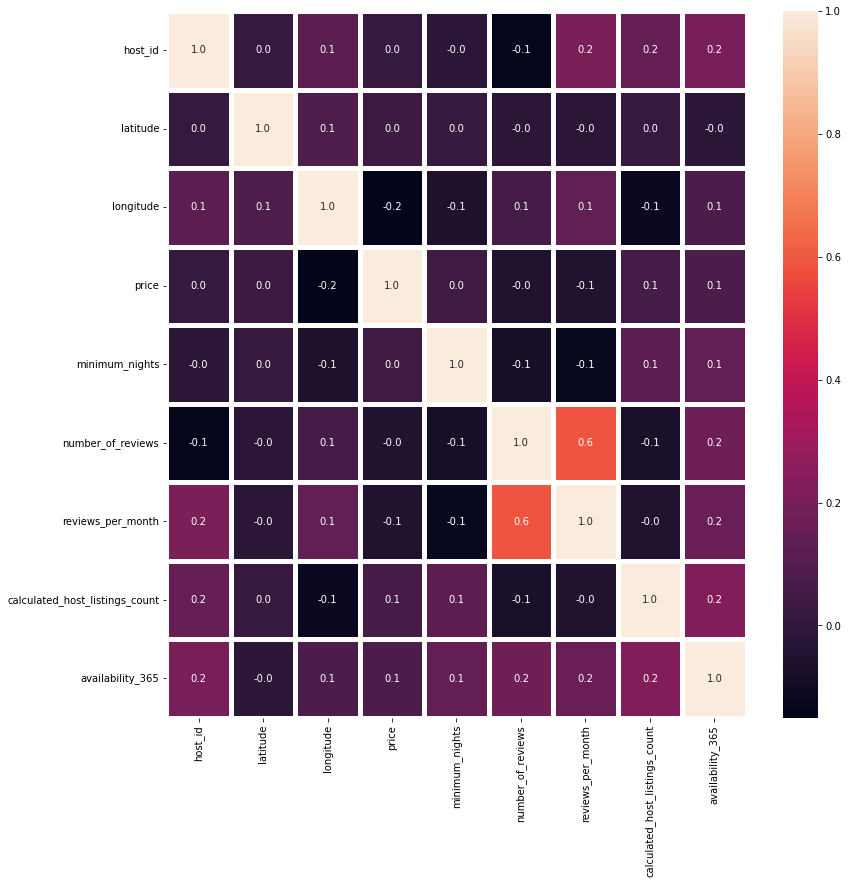

In [10]:
#Testing to see if there are any relationships between the columns in the NYC Airbnb dataset
f,ax=plt.subplots(figsize=(13,13))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

In [11]:
# Figuring out which hosts have the most listings in the NYC area
top_host = df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [12]:
# Double checking to confirm findings
top_host_point = df.calculated_host_listings_count.max()
top_host_point

327

In [13]:
# Setting up display settings for visualizations
sns.set(rc = {'figure.figsize': (10,8)})
sns.set_style('darkgrid')

In [14]:
# Finding the top Airbnb hosts in this dataset
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace = True)
top_host_df.rename(columns = {'index': 'Host_ID', 'host_id': 'P_Count'}, inplace = True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

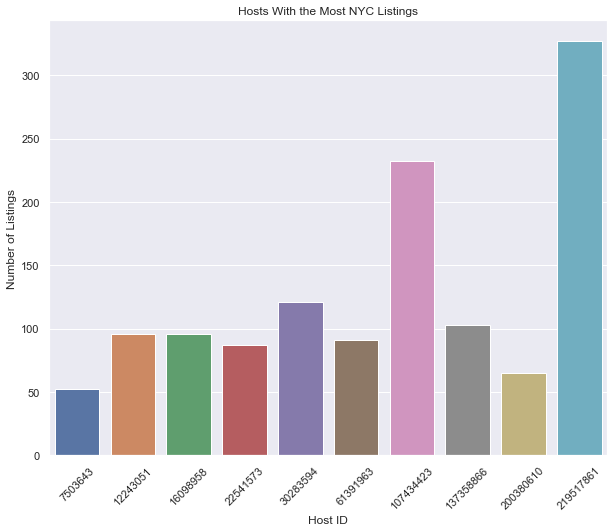

In [15]:
host_most = sns.barplot(x = 'Host_ID', y = 'P_Count', data = top_host_df)
host_most.set_title('Hosts With the Most NYC Listings')
host_most.set_ylabel('Number of Listings')
host_most.set_xlabel('Host ID')
host_most.set_xticklabels(host_most.get_xticklabels(), rotation =45)

C:\Users\saisi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

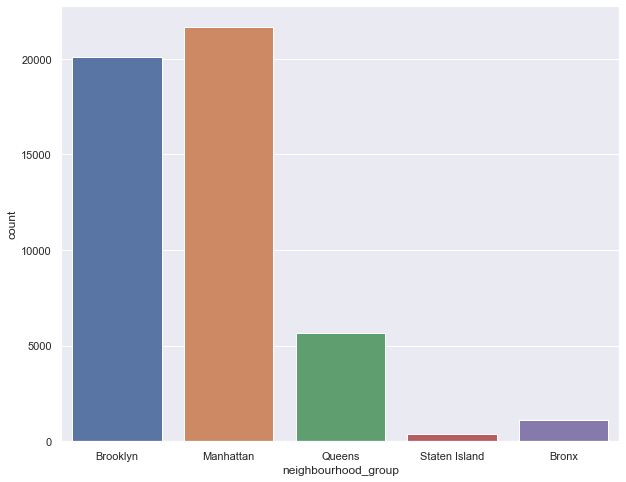

In [16]:
#Finding out the amount of properties in each neighbourhood_group
sns.countplot(df["neighbourhood_group"])

C:\Users\saisi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

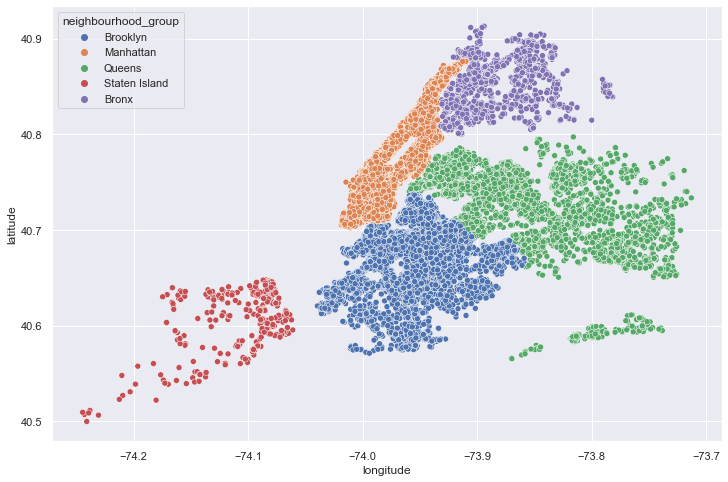

In [17]:
#Checking where neighbourhoods are located using cluster map
plt.figure(figsize = (12,8))
sns.scatterplot(df.longitude, df.latitude, hue = df.neighbourhood_group)

C:\Users\saisi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

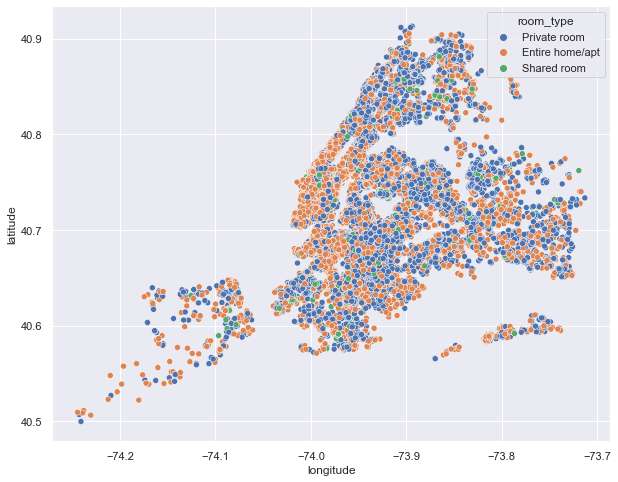

In [18]:
#Checking the locations of different Airbnb room types in NYC

sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)

Text(0.5, 1.0, 'NYC Airbnb Price Distribution and Density for Listings Below $500')

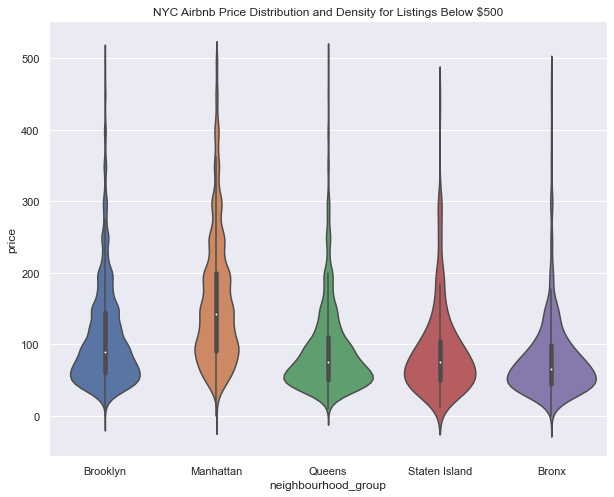

In [19]:
#Testing the distribution of NYC Airbnb Prices less than 500
sub_500_prices = df[df.price<500]
sub_5_dist = sns.violinplot(data = sub_500_prices, x ='neighbourhood_group', y='price')
sub_5_dist.set_title('NYC Airbnb Price Distribution and Density for Listings Below $500')

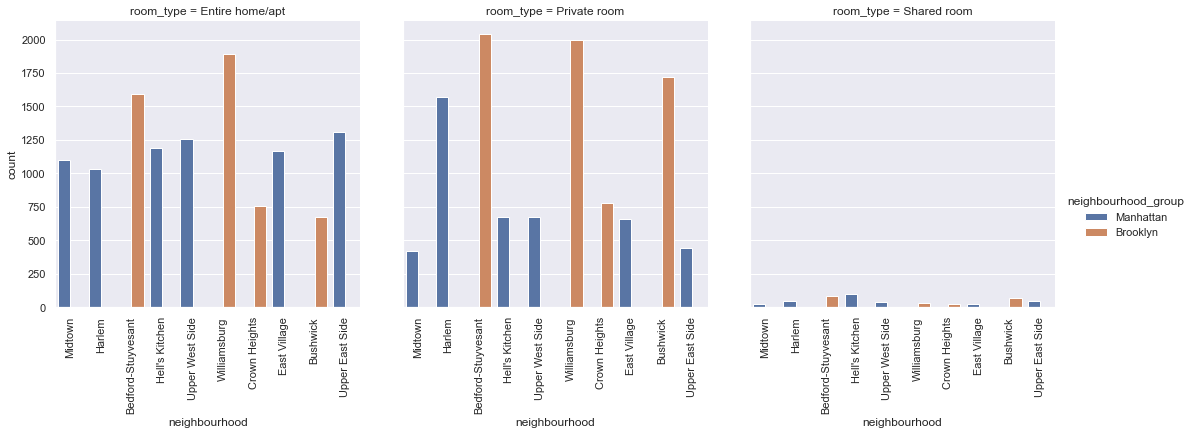

In [20]:
#Finding out the number of room_types in the top 10 neighbourhoods
top_10_locations=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

room_type_count=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=top_10_locations, kind='count')
room_type_count.set_xticklabels(rotation=90)

In [21]:
# Using a heatmap to visualize the density of NYC Airbnb locations
import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

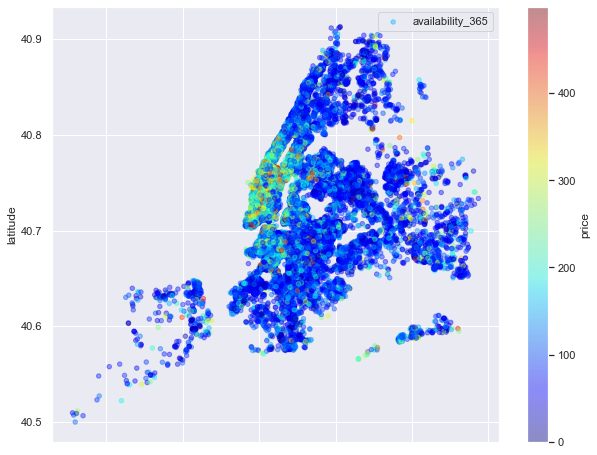

In [22]:
availability_365=sub_500_prices.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
availability_365.legend()

## Conclusion

The exploration of this dataset has been quite insightful into the Airbnb market in NYC. I saw that there a number of top hosts and one of them even had 300+ listings on the Airbnb platform. I also analyzed the frequency and distribution of room types in this dataset. Through that visualization I saw that shared rooms are some of the least common room types in the NYC area. I also have a price distribution for the range of prices that we could find in each neighbourhood group. Furthermore, I found that a vast majority of airbnb listings were located either in Manhattan or Brooklyn. Another interesting insight I found was how listings were priced based on the neighborhood. These are just some of the insights that I have found so far but there are more such as the average listing price, average rating by neighbourhood and much more. Thanks for taking the time to go through my EDA of NYC's Airbnb Listings.